# Actividad NLP - 2.0 - Aplicación de análisis de sentimientos
**Joel Isaias Solano Ocampo | A01639289**

---



## 1. Importamos e instalamos librerias y dependencias:

In [ ]:
!pip install -q transformers
!pip3 install emoji==0.6.0

import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49721 sha256=8303a9a1f486c0a9a8bd82257f0d5a33790cc41c0d9e14f3922f5b801ac92e5c
  Stored in directory: /root/.cache/pip/wheels/1b/bd/d9/310c33c45a553798a714e27e3b8395d37128425442b8c78e07
Successfully built emoji


## 2. Obtenemos nuestros tweets a traves de un Dataset proveniente de Kaggle:
* https://www.kaggle.com/datasets/mmmarchetti/tweets-dataset/

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/content/tweets.csv')
df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


## 3. Utilizamos dos modelos pre-entrenados para nuestro analisis de sentimientos:
*   **sentiment-analysis** - modelo incluido dentro de la libreria de *transformers* con la dependencia de *pipeline*.
*   **bertweet-base-sentiment-analysis** - modelo entrenado con el corpus *SemEval 2017* (alrededor de ~40k tweets). El modelo base es *BERTweet*, un modelo de *RoBERTa* entrenado en tweets en inglés.

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


## 4. Convertimos nuestra columna *'content'* en una lista de strings:

In [ ]:
data = df['content'].tolist()
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## 5. Aplicamos el modelo de *sentiment-analysis* a los primeros 1000 tweets:

In [ ]:
sen_pip = sentiment_pipeline(data[:1000])
print(sen_pip[:5])

[{'label': 'NEGATIVE', 'score': 0.9975111484527588}, {'label': 'POSITIVE', 'score': 0.9997355341911316}, {'label': 'POSITIVE', 'score': 0.5575710535049438}, {'label': 'NEGATIVE', 'score': 0.9893961548805237}, {'label': 'NEGATIVE', 'score': 0.921532392501831}]


## 6. Aplicamos el modelo de *bertweet-base-sentiment-analysis* a los primeros 1000 tweets:

In [ ]:
spec_mod = specific_model(data[:1000])
print(spec_mod[:5])

[{'label': 'NEG', 'score': 0.9199120402336121}, {'label': 'POS', 'score': 0.9915487170219421}, {'label': 'NEU', 'score': 0.7000418305397034}, {'label': 'NEU', 'score': 0.9584143757820129}, {'label': 'POS', 'score': 0.9591920375823975}]


## 7. Obtenemos los *label* de ambos modelos en listas separadas:

In [ ]:
sen_pip_labels = [d['label'] for d in sen_pip]
spec_mod_labels = [d['label'] for d in spec_mod]

## 8. Graficamos un histograma de frequencia de las etiquetas para ambos modelos:

* Frecuencia de Etiquetas | sentiment-analysis:


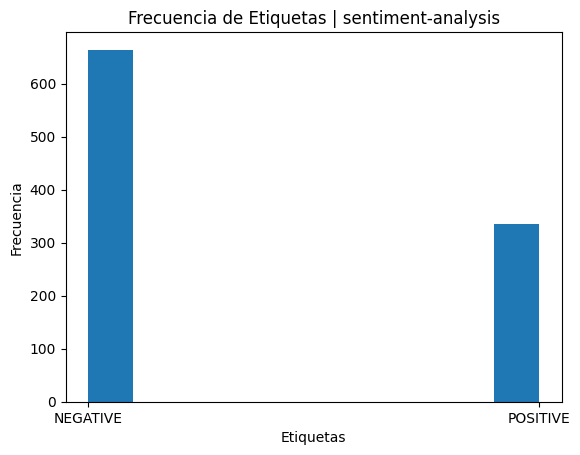

In [ ]:
plt.hist(sen_pip_labels)
plt.xlabel('Etiquetas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Etiquetas | sentiment-analysis')
plt.show()

* Frecuencia de Etiquetas | bertweet-base-sentiment-analysis:

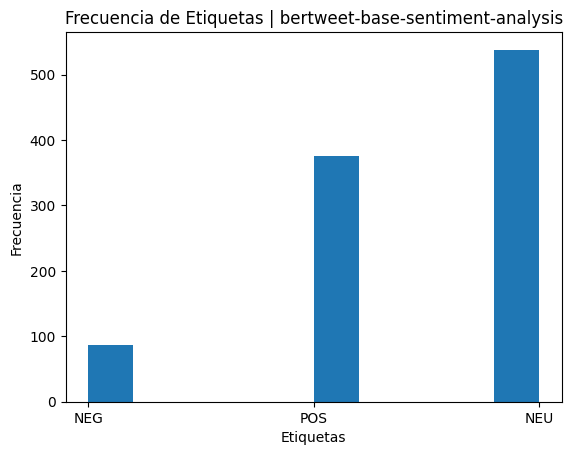

In [ ]:
plt.hist(spec_mod_labels)
plt.xlabel('Etiquetas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Etiquetas | bertweet-base-sentiment-analysis')
plt.show()

## Conclusion:
Podemos observar que se aplicaron dos modelos diferentes, donde en uno la evaluacion de los tweets se vuelve muy polarizada ya que solo los considera como positivos o negativos. En cambio el otro modelo pre-entrenado utilizado permite considerar igualmente tweets positivos y negativos, pero tambien considera comentarios neutrales. Esto nos puede mostrar mucho la diferencia en que como un simple modelo pero que se encuentra ya pre-entrenado especificamente para entender los contextos de los tweets y su "naturaleza" (si podemos llamarlo de esa manera) dan un reesultado mas amplio a que si solo aplicaramos un modelo general para el analisis de sentimientos ya que con solo interpretar ambos resultados podemos llegar a conclusiones muy diferentes.